In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [15]:
df=pd.read_csv("telecom_customer_churn.csv")

In [17]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


### Creating the copy of dataset

In [161]:
df1=df.copy()

In [163]:
df1.shape

(7043, 38)

In [165]:
df1.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

## Data Preprocessing

### Removing unnecessary columns 

In [296]:
df1.drop(['Customer ID', 'Zip Code', 'Latitude', 'Longitude','Total Revenue', 'Churn Category', 'Churn Reason'],axis=1,inplace=True)

In [298]:
df1.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract  

### No. of unique values in each column 

In [301]:
cols=df1.columns
for col in cols :
    print(f'{col}-{df1[col].nunique()}')

Gender-2
Age-62
Married-2
Number of Dependents-10
City-1106
Number of Referrals-12
Tenure in Months-72
Offer-5
Phone Service-2
Avg Monthly Long Distance Charges-3584
Multiple Lines-2
Internet Service-2
Internet Type-3
Avg Monthly GB Download-50
Online Security-2
Online Backup-2
Device Protection Plan-2
Premium Tech Support-2
Streaming TV-2
Streaming Movies-2
Streaming Music-2
Unlimited Data-2
Contract-3
Paperless Billing-2
Payment Method-3
Monthly Charge-1591
Total Charges-6540
Total Refunds-500
Total Extra Data Charges-16
Total Long Distance Charges-6068
Customer Status-3


### Checking for the nullvalues 

In [303]:
df1.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Paperless Billing                 

In [361]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [363]:
df1=df1.interpolate()

C:\Users\banur\AppData\Local\Temp\ipykernel_4508\3346565851.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df1=df1.interpolate()


In [365]:
df1=df1.dropna()
df1.head()

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Customer Status
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,...,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.0,0,134.60,Churned
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,Churned
5,Female,23,No,3,Midpines,0,9,Offer E,Yes,16.77,...,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.0,0,150.93,Stayed
6,Female,67,Yes,0,Lompoc,1,71,Offer A,Yes,9.96,...,Yes,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.0,0,707.16,Stayed
7,Male,52,Yes,0,Napa,8,63,Offer B,Yes,12.96,...,No,Two Year,Yes,Credit Card,84.65,5377.80,0.0,20,816.48,Stayed


### Cleaning the dataset

In [ ]:
df1.isnull().sum().loc[df1.isnull().sum()>0]

## Data Visualization

In [373]:
df1['Age']

2       50
3       78
5       23
6       67
7       52
        ..
7036    53
7038    20
7039    40
7040    22
7041    21
Name: Age, Length: 2194, dtype: int64

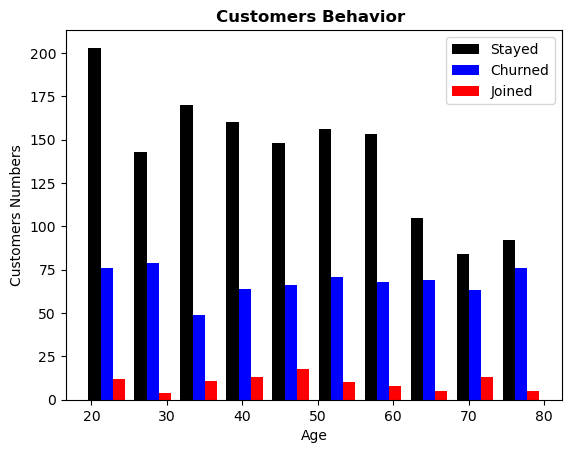

In [375]:
Customer_Stayed=df1[df1['Customer Status']=='Stayed'].Age
Customer_Churned=df1[df1['Customer Status']=='Churned'].Age
Customer_Joined=df1[df1['Customer Status']=='Joined'].Age

plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','blue','red'],label=['Stayed','Churned','Joined'])
plt.title('Customers Behavior ',fontweight ="bold")
plt.legend()

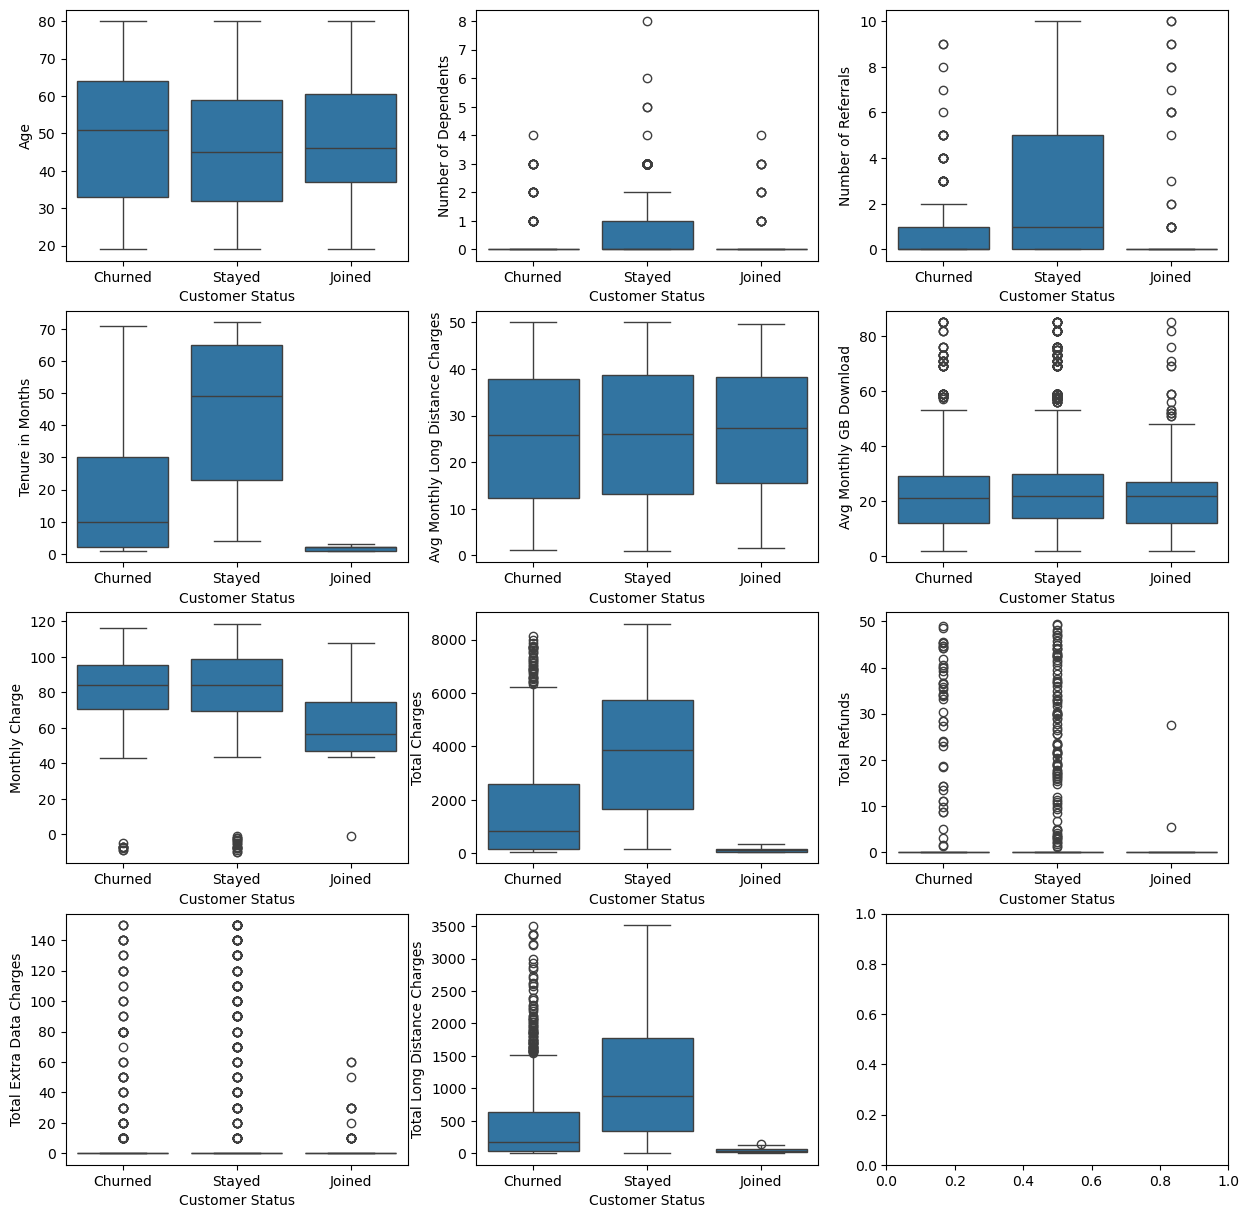

In [386]:
fig, ax = plt.subplots(4,3, figsize = (15,15))
for i, subplot in zip(num_cols, ax.flatten()):
    sns.boxplot(x = 'Customer Status', y = i , data = df1, ax = subplot)

<Axes: xlabel='Customer Status'>

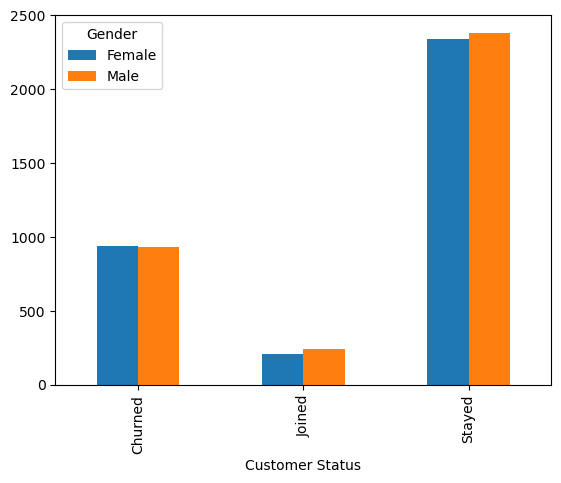

In [388]:
pd.crosstab(df['Customer Status'], df['Gender']).plot(kind='bar')

<Axes: xlabel='Customer Status'>

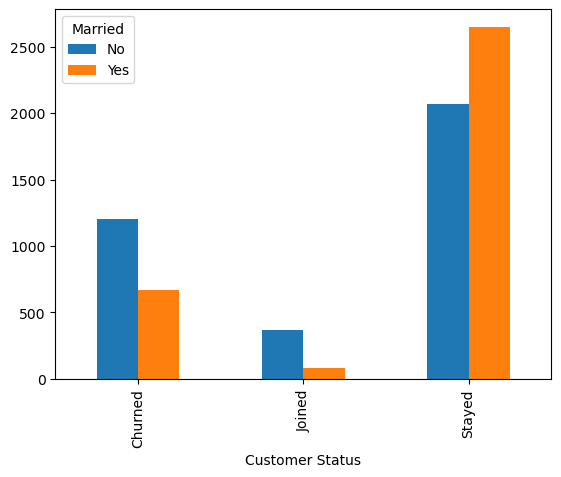

In [390]:
pd.crosstab(df['Customer Status'], df['Married']).plot(kind='bar')

## Data Modelling 

In [398]:
# replacing the gender col with 0's and 1's
df1.replace({"Gender":{'Female':0, 'Male':1}},inplace=True)

In [404]:
# Replacing Yes and No 
yes_and_no=[ 'Paperless Billing', 'Unlimited Data', 'Phone Service',
       'Streaming Movies', 'Streaming Music',  'Streaming TV',
       'Premium Tech Support', 'Device Protection Plan', 'Online Backup', 'Online Security',
       'Multiple Lines',  'Married']
for i in yes_and_no:
    df1.replace({'No':0,'Yes':1},inplace=True)

In [414]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Customer Status'] = le.fit_transform(df1['Customer Status'])

In [416]:
df1 = pd.get_dummies(data=df1, columns=['Payment Method','Contract','Internet Type','Offer','City'])

In [420]:
cols_to_scale = ['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

### Dropping the customer status for prediction

In [447]:
x=df1.drop('Customer Status', axis=1)
y=df1['Customer Status']

In [449]:
x.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Woodland Hills,City_Woody,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley
2,1,0.508197,0,0.000,0.0,0.042254,1,0.666462,0,1,...,False,False,False,False,False,False,False,False,False,False
3,1,0.967213,1,0.000,0.1,0.169014,1,0.547386,0,1,...,False,False,False,False,False,False,False,False,False,False
5,0,0.065574,0,0.375,0.0,0.112676,1,0.321691,0,1,...,False,False,False,False,False,False,False,False,False,False
6,0,0.786885,1,0.000,0.1,0.985915,1,0.182598,0,1,...,False,False,False,False,False,False,False,False,False,False
7,1,0.540984,1,0.000,0.8,0.873239,1,0.243873,1,1,...,False,False,False,False,False,False,False,False,False,False


In [451]:
y.head()

2    0
3    0
5    2
6    2
7    2
Name: Customer Status, dtype: int32

## Model Evaluation 

In [454]:
from sklearn.model_selection import train_test_split

In [456]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=5)

## Importing the models 

In [505]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 1.0/56.8 MB 3.1 MB/s eta 0:00:18
   - -------------------------------------- 1.8/56.8 MB 3.5 MB/s eta 0:00:16
   - -------------------------------------- 2.6/56.8 MB 3.6 MB/s eta 0:00:16
   -- ------------------------------------- 3.9/56.8 MB 4.1 MB/s eta 0:00:14
   --- ------------------------------------ 5.0/56.8 MB 4.4 MB/s eta 0:00:12
   ---- ----------------------------------- 6.6/56.8 MB 4.8 MB/s eta 0:00:11
   ----- ---------------------------------- 7.9/56.8 MB 5.1 MB/s eta 0:00:10
   ------ --------------------------------- 9.2/56.8 MB 5.3 MB/s eta 0:00:10
   ------- -------------------------------- 10.7/56.8 MB 5.5 MB/s eta 0:00:09
   -------- ------------------------------- 12.3/56.8 MB 5.6 MB/s eta 0:00:08
   --------- ------------------------------ 13.6/56.8 MB 5.7 MB/s eta 0:00:08
   -------

In [506]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [519]:
params_grid={
    'LogisticRegression' :{
        'model' : LogisticRegression(),
        'params':{
            'C': [1,5,10]
        }
    },
'RandomForestClassifier' :{
        'model' : RandomForestClassifier(),
        'params': {
            'n_estimators': [3,5,10]
        }
    },
'NaiveBayesGaussian' :{
        'model' : GaussianNB(),
        'params':{
        }
    },
'DecisionTreeClassifier' :{
        'model' : DecisionTreeClassifier(),
        'params': {
            'criterion': ['entropy','gini']
        }
    },
    'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]
            
        }
    }
}

In [525]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in params_grid.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [523]:
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2.head()

,model,best_score,best_params
0,LogisticRegression,0.785877,{'C': 1}
1,RandomForestClassifier,0.789977,{'n_estimators': 10}
2,NaiveBayesGaussian,0.374487,{}
3,DecisionTreeClassifier,0.793622,{'criterion': 'gini'}
4,XGB_Classifier,0.826424,{'base_score': 0.5}


In [527]:
## XGBClassifier has the best Score

In [531]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [533]:
model.score(x_test,y_test)

0.806378132118451

In [547]:
## Predicting values 
y_pred=model.predict(x_test)
y_pred[:10] # predicted values

array([2, 0, 1, 0, 0, 2, 2, 0, 2, 2], dtype=int64)

In [549]:
y_test[:10] # Actual Values

525     2
3086    0
2231    1
5041    0
4165    0
6042    0
2867    2
267     2
2706    2
3260    2
Name: Customer Status, dtype: int32

In [566]:
from sklearn.metrics import classification_report, accuracy_score

In [586]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       143
           1       0.71      0.36      0.48        14
           2       0.85      0.89      0.87       282

    accuracy                           0.81       439
   macro avg       0.76      0.64      0.68       439
weighted avg       0.80      0.81      0.80       439



In [592]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"ACCURACY: {accuracy:.2f}%")

ACCURACY: 80.64%


### Achieved 80.6% accuracy 